# Data Analysis Phase 
## Aim is to understand more about data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn

In [3]:
pd.pandas.set_option('display.max_columns',None)

In [4]:
df =pd.read_csv('Fraud.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# MISSING VALUES

In [5]:
df.isnull().values.any()

False

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [8]:
print('Fraud transactions:{}'.format(len(df[df.isFraud==1])))
print('Legal transactions:{}'.format(len(df[df.isFraud==0])))

Fraud transactions:8213
Legal transactions:6354407


The data highly imbalanced, so when prediciting a new classification it will be predicted as the majority classification

so we have to balance the imbalance dataset by Oversampling the dataset such that no data are lost

In [9]:
from collections import Counter
from sklearn.datasets import make_classification
from numpy import where
LABELS = ["Legal","Fraud"]
RANDOM_SEED = 42

In [10]:
columns = [c for c in df.columns.tolist() if c not in ["isFraud"]]
target = "isFraud"
X= df[columns]
Y= df[target]
print(X.shape)
print(Y.shape)

(6362620, 10)
(6362620,)


Text(0, 0.5, 'Frequency')

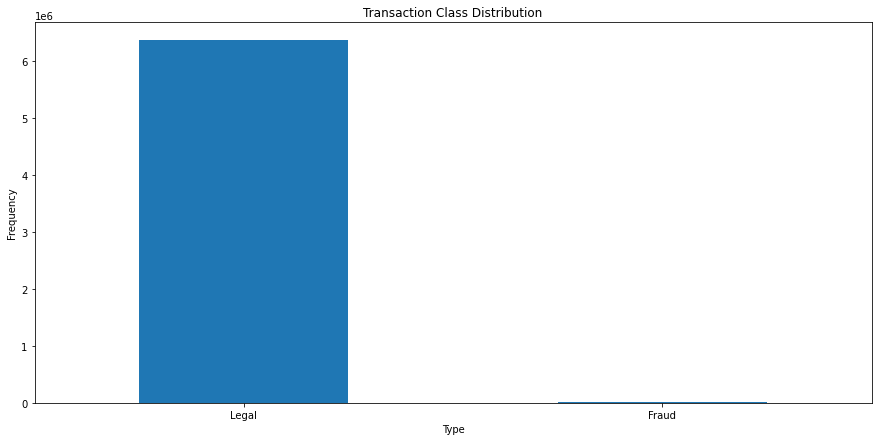

In [11]:
count_classes = pd.value_counts(df['isFraud'], sort = True)
plt.figure(figsize = (15,7))
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Type")
plt.ylabel("Frequency")

In [12]:
Fraud = df[df['isFraud']==1]
Legal = df[df['isFraud']==0]

In [13]:
print(Fraud.shape)
print(Legal.shape)

(8213, 11)
(6354407, 11)


## LABEL ENCODING

In [25]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams


In [18]:
cat_features = [feat for feat in df.columns if df[feat].dtypes == 'O']
cat_features

['type', 'nameOrig', 'nameDest']

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
new_df = df.copy()
for feat in cat_features:
    new_df[feat] = le.fit_transform(new_df[feat].astype(str))
   
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int32  
 2   amount          float64
 3   nameOrig        int32  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int32  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int32(3), int64(3)
memory usage: 461.2 MB


## OVERSAMPLING

In [37]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

columns = [c for c in new_df.columns.tolist() if c not in ["isFraud"]]
target = "isFraud"
X= new_df[columns]
Y= new_df[target]
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_resample(X,Y)



In [38]:
X_res.shape,y_res.shape

((12708768, 10), (12708768,))

In [42]:

from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 6354407, 1: 8213})
Resampled dataset shape Counter({0: 6354384, 1: 6354384})


## OUTLIERS

In [39]:
# IQR
Q1 = np.percentile(df['amount'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['amount'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1


In [40]:
upper = Q3 +1.5*IQR

lower = Q1 -1.5*IQR

In [41]:
print(upper)
print(lower)

501719.4075
-279608.33249999996


## MULTICOLLINEARITY

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(df):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

    return(vif)

calc_vif(new_df)

,variables,VIF
0,step,2.791610
1,type,4.467405
2,amount,4.149312
3,nameOrig,2.764234
4,oldbalanceOrg,576.803777
5,newbalanceOrig,582.709128
6,nameDest,3.300975
7,oldbalanceDest,73.349937
8,newbalanceDest,85.005614
9,isFraud,1.195305


<AxesSubplot:>

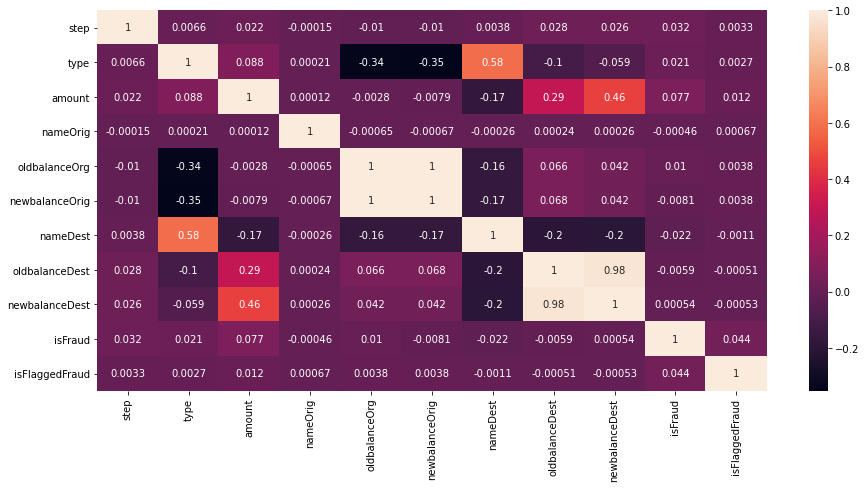

In [44]:
corr = new_df.corr()

plt.figure(figsize=(15,7))
sns.heatmap(corr,annot=True)

In [48]:
new_df['Orig_amount'] = new_df.apply(lambda x:x['oldbalanceOrg']- x['newbalanceOrig'],axis=1)
new_df['Dest_amount'] = new_df.apply(lambda x:x['oldbalanceDest']- x['newbalanceDest'],axis=1)

new_df = new_df.drop(["oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"],axis=1)
calc_vif(new_df)

,variables,VIF
0,step,2.716281
1,type,4.311403
2,amount,3.972755
3,nameOrig,2.686866
4,nameDest,3.261088
5,isFraud,1.190013
6,isFlaggedFraud,1.002563
7,Orig_amount,1.339171
8,Dest_amount,3.790322


<AxesSubplot:>

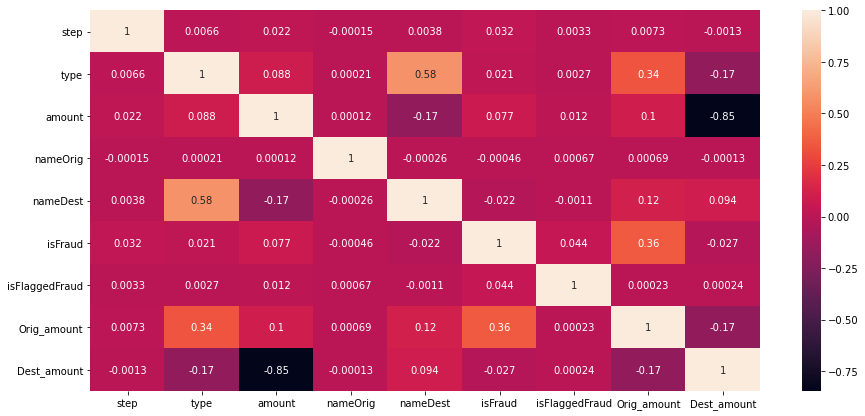

In [49]:
corr = new_df.corr()

plt.figure(figsize=(15,7))
sns.heatmap(corr,annot=True)

In [51]:
new_df[["amount","Orig_amount","Dest_amount"]]

,amount,Orig_amount,Dest_amount
0,9839.64,9839.64,0.00
1,1864.28,1864.28,0.00
2,181.00,181.00,0.00
3,181.00,181.00,21182.00
4,11668.14,11668.14,0.00
...,...,...,...
6362615,339682.13,339682.13,-339682.13
6362616,6311409.28,6311409.28,0.00
6362617,6311409.28,6311409.28,-6311409.27
6362618,850002.52,850002.52,0.00


# MODEL BUILDING

### SCALING

In [59]:
#scaling 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
new_df["Amount"] = sc.fit_transform(new_df["amount"].values.reshape(-1,1))

new_df

,step,type,amount,nameOrig,nameDest,isFraud,isFlaggedFraud,Orig_amount,Dest_amount,Amount
0,1,3,9839.64,757869,1662094,0,0,9839.64,0.00,-0.281560
1,1,3,1864.28,2188998,1733924,0,0,1864.28,0.00,-0.294767
2,1,4,181.00,1002156,439685,1,0,181.00,0.00,-0.297555
3,1,1,181.00,5828262,391696,1,0,181.00,21182.00,-0.297555
4,1,3,11668.14,3445981,828919,0,0,11668.14,0.00,-0.278532
...,...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,5651847,505863,1,0,339682.13,-339682.13,0.264665
6362616,743,4,6311409.28,1737278,260949,1,0,6311409.28,0.00,10.153953
6362617,743,1,6311409.28,533958,108224,1,0,6311409.28,-6311409.27,10.153953
6362618,743,4,850002.52,2252932,319713,1,0,850002.52,0.00,1.109765


In [60]:
# drop the column after scaling 
new_df.drop(["amount"],inplace=True,axis=1)
new_df

,step,type,nameOrig,nameDest,isFraud,isFlaggedFraud,Orig_amount,Dest_amount,Amount
0,1,3,757869,1662094,0,0,9839.64,0.00,-0.281560
1,1,3,2188998,1733924,0,0,1864.28,0.00,-0.294767
2,1,4,1002156,439685,1,0,181.00,0.00,-0.297555
3,1,1,5828262,391696,1,0,181.00,21182.00,-0.297555
4,1,3,3445981,828919,0,0,11668.14,0.00,-0.278532
...,...,...,...,...,...,...,...,...,...
6362615,743,1,5651847,505863,1,0,339682.13,-339682.13,0.264665
6362616,743,4,1737278,260949,1,0,6311409.28,0.00,10.153953
6362617,743,1,533958,108224,1,0,6311409.28,-6311409.27,10.153953
6362618,743,4,2252932,319713,1,0,850002.52,0.00,1.109765


### TRAIN TEST SPLIT

In [66]:
# splitting the train and test data to train the model
from sklearn.model_selection import train_test_split as tt

X_train,x_test,Y_train,y_test = tt(X, Y , test_size=0.3, random_state= 42)
print("Train dataste shape is:",X_train.shape)
print("Test dataset shape is:",x_test.shape)

Train dataste shape is: (4453834, 10)
Test dataset shape is: (1908786, 10)


### BAGGING

In [116]:
# As the dataset is balanced by oversampling we will use bagging classifier
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier()
bagging.fit(X_train,Y_train)

Y_pred_bag = bagging.predict(x_test)



In [120]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

print(accuracy_score(y_test,Y_pred_bag))
print(confusion_matrix(y_test,Y_pred_bag))
print(classification_report(y_test,Y_pred_bag))

0.9997396250810725
[[1906243     108]
 [    389    2046]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.95      0.84      0.89      2435

    accuracy                           1.00   1908786
   macro avg       0.97      0.92      0.95   1908786
weighted avg       1.00      1.00      1.00   1908786



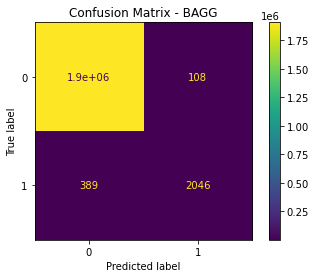

In [121]:
bagg = sklearn.metrics.confusion_matrix(y_test,Y_pred_bag)
disp = ConfusionMatrixDisplay(confusion_matrix=bagg)
disp.plot()
plt.title('Confusion Matrix - BAGG')
plt.show()

### RANDOM FOREST

In [95]:
# we will use random forest classifier also
# it is most widely used to train a machine learning model
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(X_train, Y_train)

Y_pred_rf = random_forest.predict(x_test)


In [105]:
print(accuracy_score(y_test,Y_pred_rf))
print(confusion_matrix(y_test,Y_pred_rf))
print(classification_report(y_test,Y_pred_rf))

0.9996882835477628
[[1906307      44]
 [    551    1884]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.98      0.77      0.86      2435

    accuracy                           1.00   1908786
   macro avg       0.99      0.89      0.93   1908786
weighted avg       1.00      1.00      1.00   1908786



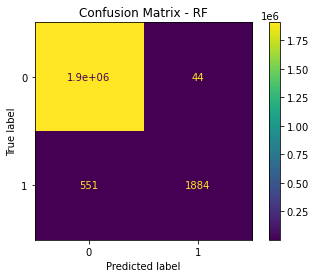

In [115]:
cm = sklearn.metrics.confusion_matrix(y_test,Y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix - RF')
plt.show()

### DECISION TREE

In [91]:
# Decision tree classifier is also used to train a machine learning model
from sklearn.tree import DecisionTreeClassifier

In [122]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred_dt = decision_tree.predict(x_test)

In [129]:
print(accuracy_score(y_test,Y_pred_dt))
print(confusion_matrix(y_test,Y_pred_dt))
print(classification_report(y_test,Y_pred_dt))

0.9996725667518517
[[1906056     295]
 [    330    2105]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.88      0.86      0.87      2435

    accuracy                           1.00   1908786
   macro avg       0.94      0.93      0.94   1908786
weighted avg       1.00      1.00      1.00   1908786



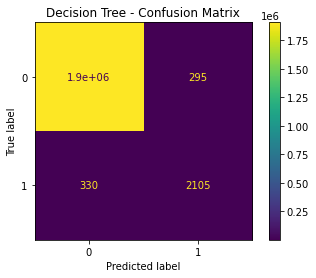

In [125]:
dt = sklearn.metrics.confusion_matrix(y_test,Y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=dt)
disp.plot()
plt.title('Decision Tree - Confusion Matrix')
plt.show()

### LOGISTIC REGRESSION

In [126]:
# logistic regression 
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(random_state=42)
logistic_regression.fit(X_train, Y_train)

y_pred_lr = logistic_regression.predict(x_test)


C:\Users\prave\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [130]:
print(accuracy_score(y_test,y_pred_lr))
print(confusion_matrix(y_test,y_pred_lr))
print(classification_report(y_test,y_pred_lr))

0.9991057143126574
[[1905976     375]
 [   1332    1103]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.75      0.45      0.56      2435

    accuracy                           1.00   1908786
   macro avg       0.87      0.73      0.78   1908786
weighted avg       1.00      1.00      1.00   1908786



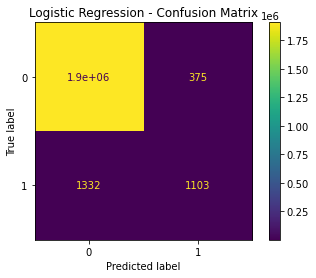

In [131]:
lr = sklearn.metrics.confusion_matrix(y_test,y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=lr)
disp.plot()
plt.title('Logistic Regression - Confusion Matrix')
plt.show()

BASED on Precision, Reacall and F1-score Bagging Classifier and Random Forest are best for building the model

ACCURACY of ["Bagging","Random Forest","Decision Tree","Logistic Regression"] is nearly EQUAL, and as in this case it is very 
important that we must predict the correct Fraud transaction such that no innocent is predicted as guilty

So, here we will see the best PRECISION Score which is of RANDOM FOREST and BAGGGING. In some case scenario we can consider 
Bagging as our best option because, it takes half less execution time than Random Forest.

But here we will consider RANDOM FOREST as it has more Precision and Recall 

What are the key factors that predict fraudulent customer? 

    Customer's identity (email addresses, credit card numbers, etc.)
    The past order details.
    Their preferred payment methods,
    The locations they have used for the transactions.
    Their network (emails, phone numbers, and payment details entered with the online account).

Do these factors make sense? If yes, How? If not, How not?

    Yes all these factors makes total sense because, including Customer's Id would give individual's behaviour
    Likewise, past order details.
    Payment methods would show some categories which help in easy predictions.
    location and network will give place, so it would be easy to monitor only those transactions or customers from that specific location or network type. 

What kind of prevention should be adopted while company update its infrastructure?
   
    
    Screen public records of the applicants.
    Integrating emerging technologies in their systems.
    Analysis of financial patterns of the entity or individual.
    Screen the entities for any negative news.
    Leverage on the advancements in AI & ML technology.

Assuming these actions have been implemented, how would you determine if they work?
    
    banks can adopt is to screen public records of the applicants, thereby ensuring their credit worthiness
    Integrating emerging technologies in their systems
    An additional layer of preventive actions that financial institutions and banks can incorporate is the analysis of financial patterns of the entity or individual.
    banks can take is to screen the entities for any negative news that might have been published in a given time period against the applicant.
    banks should leverage on the advancements in AI & ML technology, to preemptively analyze patterns and learn from historical cases.
    